In [4]:
# pip install cufflinks
# pip install palettable
# pip install Pillow
# pip install stylecloud

In [5]:
import pandas as pd
import cufflinks as cf
import warnings
warnings.filterwarnings("ignore")
from plotly.offline import plot,iplot
#pd.options.plotting.backend = "plotly"
import plotly.graph_objects as go
import plotly.express as px#graficos express
cf.go_offline()
pd.set_option("display.max_columns",200)

## FUNCIONES

In [6]:
def rename_cols(df,cols,prefix):
    new_feats=[prefix+col for col in cols]
    df=df.rename(columns=dict(zip(cols,new_feats)))
    return df

def completitud(df):
    comp=pd.DataFrame(df.isnull().sum())
    comp.reset_index(inplace=True)
    comp=comp.rename(columns={"index":"columna",0:"total"})
    comp["completitud"]=(1-comp["total"]/df.shape[0])*100
    comp=comp.sort_values(by="completitud",ascending=True)
    comp.reset_index(drop=True,inplace=True)
    return comp

### TEXTO

In [7]:
from palettable.cartocolors.qualitative import Bold_5
from unidecode import unidecode
from nltk.corpus import stopwords
from nltk import FreqDist
from PIL import Image
import re
import stylecloud
import unicodedata
import nltk
import unicodedata
import pandas as pd

**https://github.com/minimaxir/stylecloud**
- pip install stylecloud
-  pip install pillow


https://fontawesome.com/icons?d=gallery&m=free

https://jiffyclub.github.io/palettable/

https://pypi.org/project/emoji/

In [8]:
def text_clean(text, pattern="[^a-zA-Z0-9 ]"):
    text_clean = unicodedata.normalize('NFD', text).encode('ascii', 'ignore')
    text_clean= re.sub(pattern, " ", text_clean.decode("utf-8"), flags=re.UNICODE)
    text_clean = u' '.join(text_clean.lower().split())
    return text_clean

In [9]:
#https://lopezobrador.org.mx/2021/01/22/version-estenografica-de-la-conferencia-de-prensa-matutina-del-presidente-andres-manuel-lopez-obrador-464/
f = open("../data/visualizaciones/amlo.txt", "r")
corpus=f.read()

In [11]:
corpus

'Vamos a informar sobre la distribución de las vacunas, sobre el avance que se tiene en la vacunación en hospitales COVID, tanto del sector público como del sector privado, y también informar sobre la vacunación a maestros en Campeche a partir de mañana. Vamos a presentar esos dos informes, cómo vamos en la vacunación general, en el plan de aplicar vacunas en hospitales donde están médicos, enfermeras, trabajadores de la salud, atendiendo, salvando vidas, cómo vamos protegiéndolos, qué avance se lleva en lo que corresponde al sector público, privado; y también sobre esta vacunación que se va a llevar a cabo a partir de mañana en Campeche para maestros.\nEl propósito no sólo es informarles a ustedes, como siempre lo hacemos, sino también nos ven muchos por el internet y por distintos medios, para que, en el caso de Campeche, todos los médicos tengan la información, los trabajadores de la educación. Ese es un propósito principal o uno de los propósitos principales de estas conferencias, 

In [12]:
len(corpus.split())

11354

In [13]:
lista_stopwords = stopwords.words("spanish")
texto_clean=text_clean(corpus)

In [14]:
texto_clean

'vamos a informar sobre la distribucion de las vacunas sobre el avance que se tiene en la vacunacion en hospitales covid tanto del sector publico como del sector privado y tambien informar sobre la vacunacion a maestros en campeche a partir de manana vamos a presentar esos dos informes como vamos en la vacunacion general en el plan de aplicar vacunas en hospitales donde estan medicos enfermeras trabajadores de la salud atendiendo salvando vidas como vamos protegiendolos que avance se lleva en lo que corresponde al sector publico privado y tambien sobre esta vacunacion que se va a llevar a cabo a partir de manana en campeche para maestros el proposito no solo es informarles a ustedes como siempre lo hacemos sino tambien nos ven muchos por el internet y por distintos medios para que en el caso de campeche todos los medicos tengan la informacion los trabajadores de la educacion ese es un proposito principal o uno de los propositos principales de estas conferencias porque son muchos mexica

In [15]:
fdist=FreqDist(texto_clean.split())

In [16]:
fdist

FreqDist({'que': 557, 'de': 522, 'la': 348, 'a': 314, 'en': 311, 'y': 304, 'el': 286, 'se': 218, 'no': 201, 'es': 177, ...})

In [17]:


hapaxes=fdist.hapaxes()
texto_clean=" ".join(list(filter(lambda x:x not in lista_stopwords,texto_clean.split())))
texto_clean=" ".join(list(filter(lambda x:x not in hapaxes,texto_clean.split())))
fdist=FreqDist(texto_clean.split())

In [18]:
fdist

FreqDist({'si': 105, 'presidente': 83, 'lopez': 61, 'andres': 54, 'manuel': 54, 'obrador': 54, 'entonces': 50, 'tambien': 48, 'vamos': 47, 'mas': 47, ...})

In [19]:
with open("../data/visualizaciones/texto_wordcloud_amlo.txt","w") as f:
        f.write(texto_clean)

In [20]:
path_texto="../data/visualizaciones/texto_wordcloud_amlo.txt"
path_imagen="../data/visualizaciones/texto_wordcloud_amlo.png"

In [21]:
stylecloud.gen_stylecloud(file_path = path_texto,output_name=path_imagen)

In [23]:
from PIL import Image

In [26]:
fdist.most_common(20)

[('si', 105),
 ('presidente', 83),
 ('lopez', 61),
 ('andres', 54),
 ('manuel', 54),
 ('obrador', 54),
 ('entonces', 50),
 ('tambien', 48),
 ('vamos', 47),
 ('mas', 47),
 ('interlocutora', 47),
 ('estan', 44),
 ('vacunacion', 37),
 ('vacunas', 34),
 ('mil', 34),
 ('va', 33),
 ('mexico', 33),
 ('aqui', 32),
 ('ver', 32),
 ('vacuna', 30)]

In [27]:
lista_stopwords+["si"]

['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no',
 'una',
 'su',
 'al',
 'lo',
 'como',
 'más',
 'pero',
 'sus',
 'le',
 'ya',
 'o',
 'este',
 'sí',
 'porque',
 'esta',
 'entre',
 'cuando',
 'muy',
 'sin',
 'sobre',
 'también',
 'me',
 'hasta',
 'hay',
 'donde',
 'quien',
 'desde',
 'todo',
 'nos',
 'durante',
 'todos',
 'uno',
 'les',
 'ni',
 'contra',
 'otros',
 'ese',
 'eso',
 'ante',
 'ellos',
 'e',
 'esto',
 'mí',
 'antes',
 'algunos',
 'qué',
 'unos',
 'yo',
 'otro',
 'otras',
 'otra',
 'él',
 'tanto',
 'esa',
 'estos',
 'mucho',
 'quienes',
 'nada',
 'muchos',
 'cual',
 'poco',
 'ella',
 'estar',
 'estas',
 'algunas',
 'algo',
 'nosotros',
 'mi',
 'mis',
 'tú',
 'te',
 'ti',
 'tu',
 'tus',
 'ellas',
 'nosotras',
 'vosotros',
 'vosotras',
 'os',
 'mío',
 'mía',
 'míos',
 'mías',
 'tuyo',
 'tuya',
 'tuyos',
 'tuyas',
 'suyo',
 'suya',
 'suyos',
 'suyas',
 'nuestro',
 'nuestra',
 'nuestros',
 'nuestras',
 'vuestro'

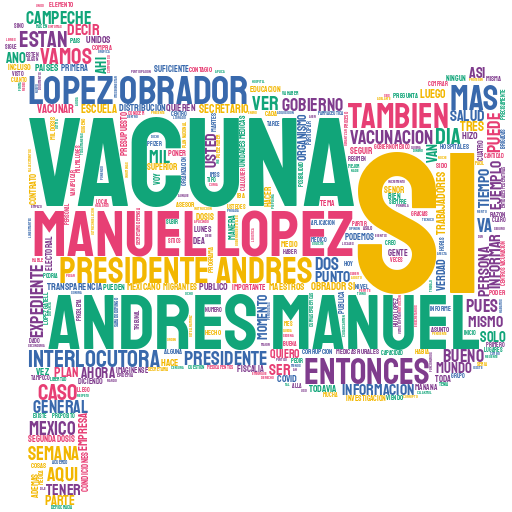

In [24]:
Image.open(path_imagen)

texto_clean=texto_clean.replace("luis potosi","").replace("san luis","")

In [28]:
fdist=FreqDist(texto_clean.split())

In [29]:
pd.DataFrame(fdist.items()).sort_values(by=1,ascending=False)

,0,1
147,si,105
72,presidente,83
63,lopez,61
398,obrador,54
397,manuel,54
...,...,...
591,2020,2
286,llegar,2
587,estimados,2
288,necesidades,2


In [30]:
words=list(pd.DataFrame(fdist.items()).sort_values(by=1,ascending=False)[1:6][0].values)

In [34]:
words=words+["interlocutora"]

In [35]:
for word in words:
    texto_clean=texto_clean.replace(word+" ","")

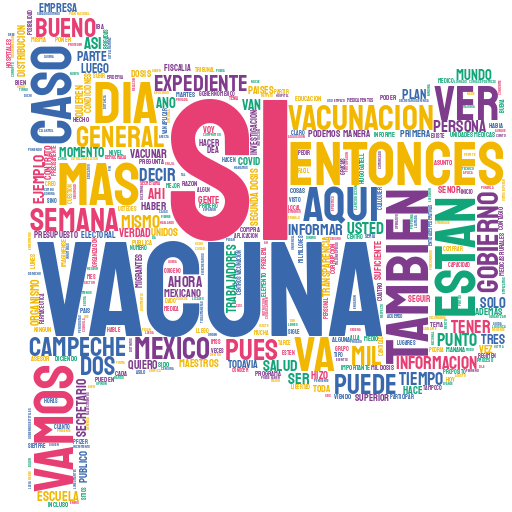

In [36]:
 with open("../data/visualizaciones/texto_wordcloud_amlo.txt","w") as f:
        f.write(texto_clean)

path_texto="../data/visualizaciones/texto_wordcloud_amlo.txt"
path_imagen="../data/visualizaciones/texto_wordcloud_amlo.png"

stylecloud.gen_stylecloud(file_path = path_texto,output_name=path_imagen)

Image.open(path_imagen)

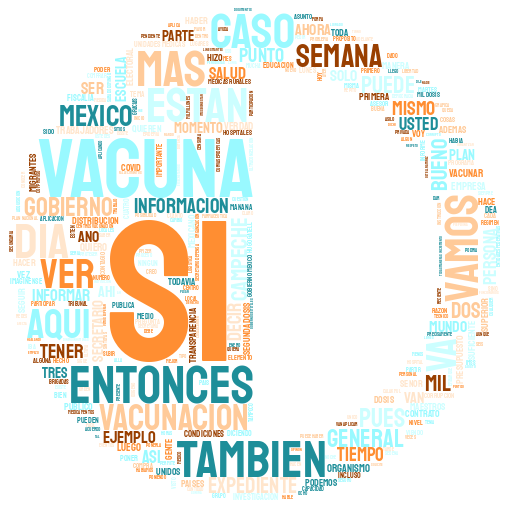

In [37]:
#cambiar colores
stylecloud.gen_stylecloud(file_path = path_texto,output_name=path_imagen,palette="lightbartlein.diverging.BlueDarkOrange12_7",icon_name="fas fa-adjust")
Image.open(path_imagen)

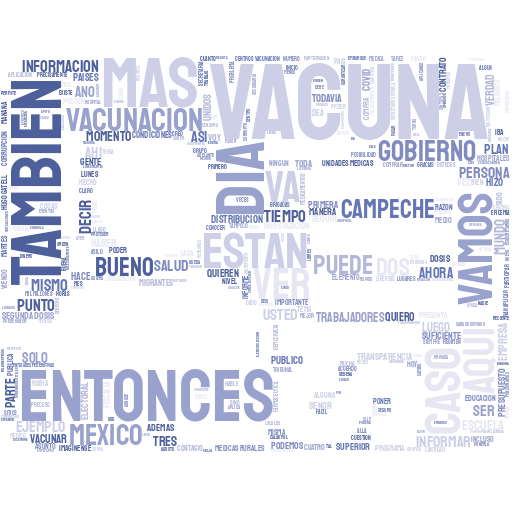

In [38]:
#Mascaras
colors=["#4d609c","#6576b4","#808bc0","#99a1cd","#b3b8d9","#cccfe6","#e6e7f2","#ffffff"]
stylecloud.gen_stylecloud(file_path = path_texto,output_name=path_imagen,colors=colors,icon_name="fas fa-address-card")

Image.open(path_imagen)

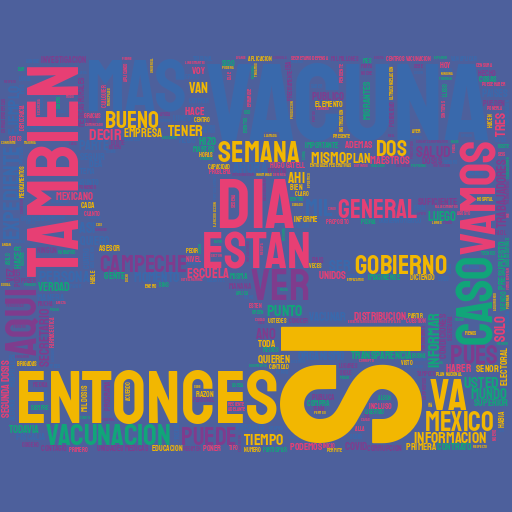

In [39]:
#Background
stylecloud.gen_stylecloud(file_path = path_texto,output_name=path_imagen,background_color='#4d609c',icon_name="fas fa-address-card")
Image.open(path_imagen)

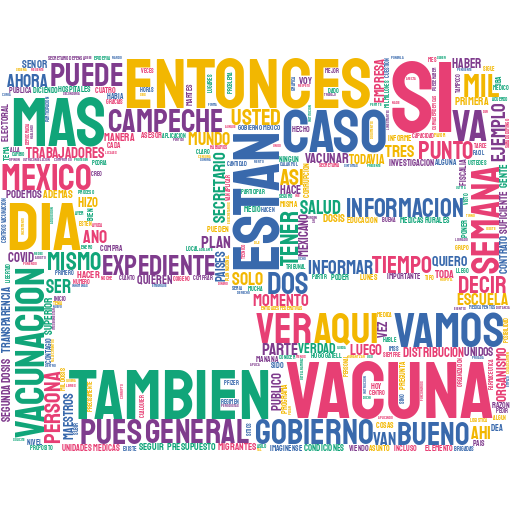

In [40]:
#FONT SIZE
stylecloud.gen_stylecloud(file_path = path_texto,output_name=path_imagen,max_font_size=100,icon_name="fas fa-address-card")
Image.open(path_imagen)